<a href="https://colab.research.google.com/github/aag112/LitView/blob/main/TCwithscikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option("max_colwidth", None)

In [75]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/workouts 2.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Sample data file - Sheet1.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/workouts.csv')
df = df2.append(df1)
df = df3.append(df)
df

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,Energy,AthleteComments,TimeTotalInHours,VelocityAverage,VelocityMax,CadenceAverage,CadenceMax,HeartRateAverage,HeartRateMax,TorqueAverage,TorqueMax,IF,TSS,HRZone1Minutes,HRZone2Minutes,HRZone3Minutes,HRZone4Minutes,HRZone5Minutes,HRZone6Minutes,HRZone7Minutes,HRZone8Minutes,HRZone9Minutes,HRZone10Minutes,PWRZone1Minutes,PWRZone2Minutes,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,PWRZone8Minutes,PWRZone9Minutes,PWRZone10Minutes,Rpe,Feeling
0,Monday Weekly Training Updates,Custom,"Monday Weekly Training Updates Monday's will be you weekly training update. Today, you will receive feedback from the last 8 days of training from Monday-Monday (unless you complete a late Monday evening ride today). Please let me know any restrictions for the upcoming 8 days before today begins. You can write in comments here on this custom entry (in Post-activity comments below) and also add manual entries on each day. For example, if you need off this Saturday or have a time restriction, please write that in today (in Post-activity comments below) or put a custom box for Saturday's TrainingPeaks box. In your custom entires, you can include anything you want including: 1. Travel 2. Work 3. Doctors appointments 4. Family 5. Vacation 6. Any other obligations outside of training",0.250000,NaN,2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Body Weight Exercise Routine (1 Set),Strength,"Body Weight Exercise Routine Shoot for 1 set of the following exercises: *Focus on good form by keeping back straight and abs tight for each exercise. Focus on 3-5 seconds for each rep (except superman and leg lift holds) ------------------------------------------------------- Warm Up: 15 minutes walk, jog, or stationary bike ------------------------------------------------------- Exercises: 1) 1 legged squats: 10-15 each leg 2) Pull-ups (max); you can do :30-:60 planks instead or both 3) Push-ups 10-25 4) Bridges 15-20; you can do 1-legged bridges for more of a challenge 5) Supeman's :30-:60 holds 6) Crunches 30-100; Bicycle Crunches 50-150 Leg raise holds (30 seconds-3 minutes) 7) Calf raises 10-15 each leg ------------------------------------------------------- Cool Down: I'd recommend rolling out your legs, back, and hips with a foam roller and doing stretches after your workout. You can also get a massage today.",0.750000,NaN,2021-02-01,"* Refer to client form document for details on body weight exercise routine. Also, see attached PDF file",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Full Body Stretch Routine,Custom,"Follow this full body stretch routine which should take 20-30 minutes. These are great full body stretches which are essential for full body fitness and recovery. If you have never done one of the stretches listed, go into it with ease and focus on good form and do not overstretch or go into any pain. The stretch routine should be relaxing and therapeutic If you are sore or tight it it will be great to loosen up your muscles. If you do not have time to get all of these stretches in, go ahead and pick out your favorite ones. These are my favorite: 1) Figure Four Stretch 2) 90/90 Stretch 3) Lunging Hip Flexor Stretch 4) Knee to Chest Stretch 5) Sphinx Pose 6) Extended Puppy Pose",0.416667,NaN,2021-02-01,A yoga mat with good thickness (your spine doesn't dig into the mat and feel the floor) is important for cushion for the spine and back. ------------------------------------------------------- Google Shared Link: https://drive.google.com/file/d/1leeAIBxGCGTbZoKQQ7gyuDkBY_1p3GX8/view?usp=sharing,NaN,NaN,NaN,NaN,NaN,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [76]:
col_list = ['AthleteComments', 'Rpe']
df1 = df[col_list]

In [77]:
df1 = df1.dropna()
df1

,AthleteComments,Rpe
26,*02/12/2021 Steven Perezluha: 1st 21' ramp: 317 watts/163bpm/88rpm 0-5': 272 watts 5-10': 300 watts 10-15': 323 watts 15-20': 346 watts 20-21':444 watts Final 11': 345 watts 2nd 21' ramp: 320 watts/167bpm/87rpm 0-5': 275 watts 5-10': 304 watts 10-15': 326 watts 15-20': 347 watts 20-21': 452 watts Final 20': 323 watts Final 11': 346 watts Final 5': 370 watts* *02/12/2021 Steven Perezluha: The final 6' of this effort should be a good push like it will be for final 2.5 miles of the Poly TT Sunday. Good work on this! I did make a small change to make these 22' but I guess your Garmin loaded the 21' version on... no big deal.*,7.0
37,"*02/17/2021 Steven Perezluha: 72' zone 2 block with sprints: 240 watts/128bpm/86rpm (20.2mph) NP 254 watts 15"" sprints wattage: 1) 634 (best of the day) 2) 551 3) 621 4) 510 5) 573 6) 564 7) 544 8) 543 15"" avg: 577 watts* *02/17/2021 Steven Perezluha: Just want to keep a little snap in your legs with the sprints.*",4.0
38,"*02/18/2021 Steven Perezluha: Power right on point today power wise. To get that average speed 25.5mph... the best spot I could think would be a flat freshly paved road like 478 in between center hill and Webster. Or Van Fleet bike trail or Youth Camp road... This villa city TT is challenging to get that average speed up that high.* *02/18/2021 Chris Lutz: Sure, just given the time constraints this was my best option given the prescription, speed aside.* *02/18/2021 Steven Perezluha: 1st 10-mile TT: 25:33 (23.5mph) 336 watts/168bpm/88rpm 1st half: 332 watts/22.4mph 2nd half: 340 watts/24.7mph 2nd 10-mile TT: 25:16 (23.8mph) 341 watts/171bpm/87rpm 1st half: 336 watts/22.6mph 2nd half: 346 watts/25.3mph*",8.0
39,"*02/18/2021 Chris Lutz: dont think I quite have the aerobic running base yet to take much control of pacing tempo zones, just ran on PE today and felt a bit all over the place. Seems this turned into my actual OD run for the week. It will get better.* *02/20/2021 Nick Radkewich: It's may have been a stretch but a push early on helps development and gives you a sense of limits/pacing/feel. Maybe even respect for where you have been before. #2 Data looked really solid. 5:30/mile may have been the push that made it tough.* *02/21/2021 Chris Lutz: Respect, yes. Wanted to dance in mid 5s, it will come back.*",7.0
41,*02/19/2021 Steven Perezluha: 2-hour block: 262 watts/147bpm/85rpm (21.5mph) 277 watts NP ~3:40 of stop time 269 watts without stops High Zone 2 Avg: 238 watts Sweetspot Avg: 302 watts Nice work today thats a full hour of sweetspot power during the 2-hours* *02/19/2021 Chris Lutz: Thanks. I got dumped on with the rain and had to stop in a couple places either at road crossings or where the road was under water.*,6.0
...,...,...
186,*05/06/2021 Becky DiSorbo: Open water. It’s wavy but kind of fun. The evening swim is with two swimmers at my speed so it’s good. Felt it in my lats. No swim Thursday since I did 3 open swims in a row and plan to do one Friday and this weekend.*,5.0
187,*05/05/2021 Becky DiSorbo: Better bike route. still a pain with lights but was pretty good with timing. Messed up route on First one.* *05/05/2021 Becky DiSorbo: Power in edge file which didn’t have the workout in it so used watch for workout and edge to get power.* *05/05/2021 Becky DiSorbo: Looks Like Watch picked up power*,4.0
191,*05/06/2021 Becky DiSorbo: Runs felt strong.* *05/06/2021 Becky DiSorbo: Brick done out of car.* *05/06/2021 Becky DiSorbo: Had to put my bike in back and lock car after each interval and didn’t have my tri run shoes so was tying my shoelaces. Anyway it was doable.* *05/06/2021 Becky DiSorbo: My left glute is sore though* *05/06/2021 Becky DiSorbo: Sorry no I mean my right glute*,6.0
202,*05/08/2021 Becky DiSorbo: Lights at various points. Some friendly cyclists. Passed a group then they stayed on my wheel which pushed me.... some good hills on this ride.*,5.0


In [68]:
df1['Rpe'].mean()

5.556818181818182

In [ ]:
#filling in null rpe values with mean value
#df1['Rpe'].fillna(5.0, inplace = True)
#df1

In [78]:
df = df1
df.reset_index(inplace=True)
df

,index,AthleteComments,Rpe
0,26,*02/12/2021 Steven Perezluha: 1st 21' ramp: 317 watts/163bpm/88rpm 0-5': 272 watts 5-10': 300 watts 10-15': 323 watts 15-20': 346 watts 20-21':444 watts Final 11': 345 watts 2nd 21' ramp: 320 watts/167bpm/87rpm 0-5': 275 watts 5-10': 304 watts 10-15': 326 watts 15-20': 347 watts 20-21': 452 watts Final 20': 323 watts Final 11': 346 watts Final 5': 370 watts* *02/12/2021 Steven Perezluha: The final 6' of this effort should be a good push like it will be for final 2.5 miles of the Poly TT Sunday. Good work on this! I did make a small change to make these 22' but I guess your Garmin loaded the 21' version on... no big deal.*,7.0
1,37,"*02/17/2021 Steven Perezluha: 72' zone 2 block with sprints: 240 watts/128bpm/86rpm (20.2mph) NP 254 watts 15"" sprints wattage: 1) 634 (best of the day) 2) 551 3) 621 4) 510 5) 573 6) 564 7) 544 8) 543 15"" avg: 577 watts* *02/17/2021 Steven Perezluha: Just want to keep a little snap in your legs with the sprints.*",4.0
2,38,"*02/18/2021 Steven Perezluha: Power right on point today power wise. To get that average speed 25.5mph... the best spot I could think would be a flat freshly paved road like 478 in between center hill and Webster. Or Van Fleet bike trail or Youth Camp road... This villa city TT is challenging to get that average speed up that high.* *02/18/2021 Chris Lutz: Sure, just given the time constraints this was my best option given the prescription, speed aside.* *02/18/2021 Steven Perezluha: 1st 10-mile TT: 25:33 (23.5mph) 336 watts/168bpm/88rpm 1st half: 332 watts/22.4mph 2nd half: 340 watts/24.7mph 2nd 10-mile TT: 25:16 (23.8mph) 341 watts/171bpm/87rpm 1st half: 336 watts/22.6mph 2nd half: 346 watts/25.3mph*",8.0
3,39,"*02/18/2021 Chris Lutz: dont think I quite have the aerobic running base yet to take much control of pacing tempo zones, just ran on PE today and felt a bit all over the place. Seems this turned into my actual OD run for the week. It will get better.* *02/20/2021 Nick Radkewich: It's may have been a stretch but a push early on helps development and gives you a sense of limits/pacing/feel. Maybe even respect for where you have been before. #2 Data looked really solid. 5:30/mile may have been the push that made it tough.* *02/21/2021 Chris Lutz: Respect, yes. Wanted to dance in mid 5s, it will come back.*",7.0
4,41,*02/19/2021 Steven Perezluha: 2-hour block: 262 watts/147bpm/85rpm (21.5mph) 277 watts NP ~3:40 of stop time 269 watts without stops High Zone 2 Avg: 238 watts Sweetspot Avg: 302 watts Nice work today thats a full hour of sweetspot power during the 2-hours* *02/19/2021 Chris Lutz: Thanks. I got dumped on with the rain and had to stop in a couple places either at road crossings or where the road was under water.*,6.0
...,...,...,...
787,186,*05/06/2021 Becky DiSorbo: Open water. It’s wavy but kind of fun. The evening swim is with two swimmers at my speed so it’s good. Felt it in my lats. No swim Thursday since I did 3 open swims in a row and plan to do one Friday and this weekend.*,5.0
788,187,*05/05/2021 Becky DiSorbo: Better bike route. still a pain with lights but was pretty good with timing. Messed up route on First one.* *05/05/2021 Becky DiSorbo: Power in edge file which didn’t have the workout in it so used watch for workout and edge to get power.* *05/05/2021 Becky DiSorbo: Looks Like Watch picked up power*,4.0
789,191,*05/06/2021 Becky DiSorbo: Runs felt strong.* *05/06/2021 Becky DiSorbo: Brick done out of car.* *05/06/2021 Becky DiSorbo: Had to put my bike in back and lock car after each interval and didn’t have my tri run shoes so was tying my shoelaces. Anyway it was doable.* *05/06/2021 Becky DiSorbo: My left glute is sore though* *05/06/2021 Becky DiSorbo: Sorry no I mean my right glute*,6.0
790,202,*05/08/2021 Becky DiSorbo: Lights at various points. Some friendly cyclists. Passed a group then they stayed on my wheel which pushed me.... some good hills on this ride.*,5.0


In [79]:
df = df.drop(columns = ['index'])

In [80]:
conditions = [(df['Rpe'] < 4.00),
              (df['Rpe'] >= 4.00) & (df['Rpe'] <= 6.00),
              (df['Rpe'] >= 7.00)]

values = ['Underworked','Balanced', 'Overworked']
df['Sentiment'] = np.select(conditions, values)

In [81]:
df['Rpe'].isna().sum()

0

In [82]:
df['Sentiment'] = df['Sentiment'].factorize()[0]

from io import StringIO

sent_id_df = df[['Rpe', 'Sentiment']].drop_duplicates().sort_values('Sentiment')
sent_to_id = dict(sent_id_df.values)
id_to_sent = dict(sent_id_df[['Sentiment', 'Rpe']].values)

In [83]:
df.head()

,AthleteComments,Rpe,Sentiment
0,*02/12/2021 Steven Perezluha: 1st 21' ramp: 317 watts/163bpm/88rpm 0-5': 272 watts 5-10': 300 watts 10-15': 323 watts 15-20': 346 watts 20-21':444 watts Final 11': 345 watts 2nd 21' ramp: 320 watts/167bpm/87rpm 0-5': 275 watts 5-10': 304 watts 10-15': 326 watts 15-20': 347 watts 20-21': 452 watts Final 20': 323 watts Final 11': 346 watts Final 5': 370 watts* *02/12/2021 Steven Perezluha: The final 6' of this effort should be a good push like it will be for final 2.5 miles of the Poly TT Sunday. Good work on this! I did make a small change to make these 22' but I guess your Garmin loaded the 21' version on... no big deal.*,7.0,0
1,"*02/17/2021 Steven Perezluha: 72' zone 2 block with sprints: 240 watts/128bpm/86rpm (20.2mph) NP 254 watts 15"" sprints wattage: 1) 634 (best of the day) 2) 551 3) 621 4) 510 5) 573 6) 564 7) 544 8) 543 15"" avg: 577 watts* *02/17/2021 Steven Perezluha: Just want to keep a little snap in your legs with the sprints.*",4.0,1
2,"*02/18/2021 Steven Perezluha: Power right on point today power wise. To get that average speed 25.5mph... the best spot I could think would be a flat freshly paved road like 478 in between center hill and Webster. Or Van Fleet bike trail or Youth Camp road... This villa city TT is challenging to get that average speed up that high.* *02/18/2021 Chris Lutz: Sure, just given the time constraints this was my best option given the prescription, speed aside.* *02/18/2021 Steven Perezluha: 1st 10-mile TT: 25:33 (23.5mph) 336 watts/168bpm/88rpm 1st half: 332 watts/22.4mph 2nd half: 340 watts/24.7mph 2nd 10-mile TT: 25:16 (23.8mph) 341 watts/171bpm/87rpm 1st half: 336 watts/22.6mph 2nd half: 346 watts/25.3mph*",8.0,0
3,"*02/18/2021 Chris Lutz: dont think I quite have the aerobic running base yet to take much control of pacing tempo zones, just ran on PE today and felt a bit all over the place. Seems this turned into my actual OD run for the week. It will get better.* *02/20/2021 Nick Radkewich: It's may have been a stretch but a push early on helps development and gives you a sense of limits/pacing/feel. Maybe even respect for where you have been before. #2 Data looked really solid. 5:30/mile may have been the push that made it tough.* *02/21/2021 Chris Lutz: Respect, yes. Wanted to dance in mid 5s, it will come back.*",7.0,0
4,*02/19/2021 Steven Perezluha: 2-hour block: 262 watts/147bpm/85rpm (21.5mph) 277 watts NP ~3:40 of stop time 269 watts without stops High Zone 2 Avg: 238 watts Sweetspot Avg: 302 watts Nice work today thats a full hour of sweetspot power during the 2-hours* *02/19/2021 Chris Lutz: Thanks. I got dumped on with the rain and had to stop in a couple places either at road crossings or where the road was under water.*,6.0,1


In [84]:
text = df['AthleteComments']

In [85]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['AthleteComments']=df['AthleteComments'].apply(remove_special_characters)

In [86]:
def remove_dates(text, remove_digits=True):
    pattern=r"\b\d+\b"
    text=re.sub(pattern,'',text)
    return text

df['AthleteComments']=df['AthleteComments'].apply(remove_dates)   

In [ ]:
#might need to define a function that removes the name of the athlete to maximize importance of text

In [87]:
text

0                                                                                                                                                                   Steven Perezluha 1st  ramp  watts163bpm88rpm   watts   watts   watts   watts  watts Final   watts 2nd  ramp  watts167bpm87rpm   watts   watts   watts   watts   watts Final   watts Final   watts Final   watts  Steven Perezluha The final  of this effort should be a good push like it will be for final  miles of the Poly TT Sunday Good work on this I did make a small change to make these  but I guess your Garmin loaded the  version on no big deal
1                                                                                                                                                                                                                                                                                                                                                                                                    

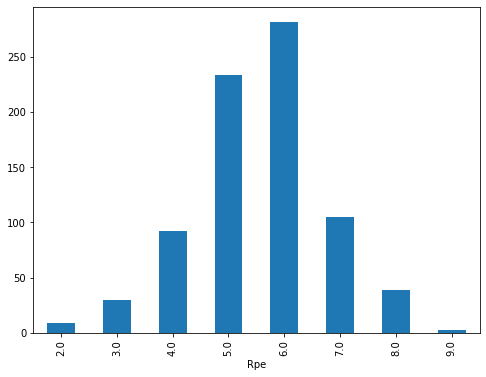

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Rpe').AthleteComments.count().plot.bar(ylim=0)
plt.show()

#sublinear_df set to true to use a logarithmic form for frequency
#min_df is the min num of samples a word must be present in to be kept
#norm is l2 to ensure all feature vectors have euclidean norm of 1
#ngram set to 1,2 to indicate both unigrams and bigrams are relevant

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.AthleteComments).toarray()
labels = df.Sentiment
features.shape
print("This is the number of athlete comments, represented by number of features")
features.shape

This is the number of athlete comments, represented by number of features


(792, 757)

In [92]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine
# has been programmed to ignore, both when indexing entries for searching and when retrieving them 
# as the result of a search query.
stop = set(stopwords.words("english"))

# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [93]:
df['AthleteComments'] = df.AthleteComments.map(remove_stopwords)
df.AthleteComments

0                                                                                                                                                                                          steven perezluha 1st ramp watts163bpm88rpm watts watts watts watts watts final watts 2nd ramp watts167bpm87rpm watts watts watts watts watts final watts final watts final watts steven perezluha final effort good push like final miles poly tt sunday good work make small change make guess garmin loaded version big deal
1                                                                                                                                                                                                                                                                                                                                                             steven perezluha zone block sprints watts128bpm86rpm 202mph np watts sprints wattage best day avg watts steven perezluha want keep little snap l

In [ ]:
#find the terms that are the most correlated with each RPE

In [94]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Rpe, Sentiment in sorted(sent_to_id.items()):
  features_chi2 = chi2(features, labels == Sentiment)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Rpe))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '2.0':
  . Most correlated unigrams:
. thats
. joe
  . Most correlated bigrams:
. disorbo easy
. disorbo kept
# '3.0':
  . Most correlated unigrams:
. thats
. joe
  . Most correlated bigrams:
. disorbo easy
. disorbo kept
# '4.0':
  . Most correlated unigrams:
. hard
. watts
  . Most correlated bigrams:
. hard work
. steven perezluha
# '5.0':
  . Most correlated unigrams:
. hard
. watts
  . Most correlated bigrams:
. hard work
. steven perezluha
# '6.0':
  . Most correlated unigrams:
. hard
. watts
  . Most correlated bigrams:
. hard work
. steven perezluha
# '7.0':
  . Most correlated unigrams:
. watts
. hard
  . Most correlated bigrams:
. disorbo legs
. hard work
# '8.0':
  . Most correlated unigrams:
. watts
. hard
  . Most correlated bigrams:
. disorbo legs
. hard work
# '9.0':
  . Most correlated unigrams:
. watts
. hard
  . Most correlated bigrams:
. disorbo legs
. hard work


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['AthleteComments'], df['Rpe'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [97]:
print(clf.predict(count_vect.transform(
    ['todays workout was easy I didnt break a sweat. kept it going'])))

[5.]


#experiment with different machine learning models, evaluate their accuracy and find source of potential issues

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

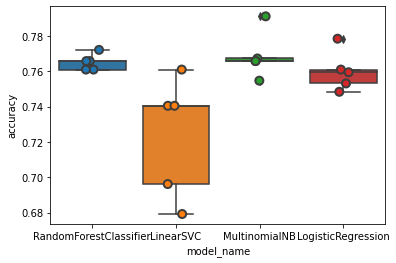

In [99]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [100]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.723493
LogisticRegression        0.760115
MultinomialNB             0.768959
RandomForestClassifier    0.765162
Name: accuracy, dtype: float64

#using the "best model" NB let's observe the confusion matrix

In [101]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

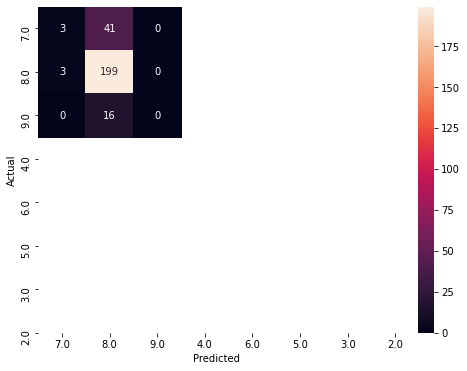

In [102]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sent_id_df.Rpe.values, yticklabels=sent_id_df.Rpe.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [103]:
from IPython.display import display

for predicted in sent_id_df.Sentiment:
  for actual in sent_id_df.Sentiment:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_sent[actual], id_to_sent[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Rpe', 'AthleteComments']])
      print('')

'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'2.0' predicted as '5.0' : 16 examples.


,Rpe,AthleteComments
700,3.0,becky disorbo felt good rainy run dirt shoulder running road
762,2.0,becky disorbo kept weight light
717,3.0,becky disorbo easy run nice light drizzle made nice run stayed dirt run
473,2.0,becky disorbo oceanside walk
145,3.0,becky disorbo easy skiing joe
236,2.0,becky disorbo easy ride another friend catch talked entire time becky disorbo legs felt fine
731,3.0,becky disorbo felt strong rested day sat spent anna campus nick radkewich good result miles felt strong build week coming tempo
558,3.0,becky disorbo hike
71,3.0,becky disorbo warm
712,3.0,becky disorbo warm sets pull 4x100s easy back 6x50s flyback backbrst brstfree 4x50s easy



'2.0' predicted as '5.0' : 16 examples.


,Rpe,AthleteComments
700,3.0,becky disorbo felt good rainy run dirt shoulder running road
762,2.0,becky disorbo kept weight light
717,3.0,becky disorbo easy run nice light drizzle made nice run stayed dirt run
473,2.0,becky disorbo oceanside walk
145,3.0,becky disorbo easy skiing joe
236,2.0,becky disorbo easy ride another friend catch talked entire time becky disorbo legs felt fine
731,3.0,becky disorbo felt strong rested day sat spent anna campus nick radkewich good result miles felt strong build week coming tempo
558,3.0,becky disorbo hike
71,3.0,becky disorbo warm
712,3.0,becky disorbo warm sets pull 4x100s easy back 6x50s flyback backbrst brstfree 4x50s easy



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'2.0' predicted as '5.0' : 16 examples.


,Rpe,AthleteComments
700,3.0,becky disorbo felt good rainy run dirt shoulder running road
762,2.0,becky disorbo kept weight light
717,3.0,becky disorbo easy run nice light drizzle made nice run stayed dirt run
473,2.0,becky disorbo oceanside walk
145,3.0,becky disorbo easy skiing joe
236,2.0,becky disorbo easy ride another friend catch talked entire time becky disorbo legs felt fine
731,3.0,becky disorbo felt strong rested day sat spent anna campus nick radkewich good result miles felt strong build week coming tempo
558,3.0,becky disorbo hike
71,3.0,becky disorbo warm
712,3.0,becky disorbo warm sets pull 4x100s easy back 6x50s flyback backbrst brstfree 4x50s easy



'2.0' predicted as '5.0' : 16 examples.


,Rpe,AthleteComments
700,3.0,becky disorbo felt good rainy run dirt shoulder running road
762,2.0,becky disorbo kept weight light
717,3.0,becky disorbo easy run nice light drizzle made nice run stayed dirt run
473,2.0,becky disorbo oceanside walk
145,3.0,becky disorbo easy skiing joe
236,2.0,becky disorbo easy ride another friend catch talked entire time becky disorbo legs felt fine
731,3.0,becky disorbo felt strong rested day sat spent anna campus nick radkewich good result miles felt strong build week coming tempo
558,3.0,becky disorbo hike
71,3.0,becky disorbo warm
712,3.0,becky disorbo warm sets pull 4x100s easy back 6x50s flyback backbrst brstfree 4x50s easy



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'9.0' predicted as '5.0' : 41 examples.


,Rpe,AthleteComments
40,7.0,becky disorbo felt good flat right second min interval forgot time ended min interval turn arounds wait bike buddy minute flat tire fix min interval becky disorbo longer ride get good spot intervals becky disorbo miles back easy riding home
247,8.0,becky disorbo felt good figure turn around rest rest intervals wacky first lane divided road construction circles turn arounds different junctures good considering grade climbing nick radkewich great job nice workout close vo2 great week get recovered ready great weekend
266,7.0,becky disorbo legs felt fatigued
415,7.0,becky disorbo felt good right bike hit first water stations miles one race guys passed holding 630ish paces
150,7.0,becky disorbo left knee little tight
699,7.0,becky disorbo zone hard min intervals heart rate becky disorbo peloton need set indoor trainer
31,7.0,becky disorbo remembered wear garmin pod hard measure pace loop run hilly tried maintain effort miles pace hamstring issue felt piraformis bit
240,7.0,becky disorbo heart rate watch forgot band felt pretty good stomach issues today miles reversed second backwards last half easy legs felt worse last miles becky disorbo best od run weeks id say nick radkewich thats like hear end week great week
103,7.0,becky disorbo liked single leg pedaling challenging show strap doable becky disorbo level mins level mins level mins becky disorbo watts stationery bike last mins bike stopped one point
268,8.0,becky disorbo 1st min intervals 2nd sec intervals becky disorbo legs tired becky disorbo speed interval work nick radkewich big recovery day tomorrow ez day wed want take extra recovery day push race friday back dayweather feel logistics call



'2.0' predicted as '5.0' : 16 examples.


,Rpe,AthleteComments
700,3.0,becky disorbo felt good rainy run dirt shoulder running road
762,2.0,becky disorbo kept weight light
717,3.0,becky disorbo easy run nice light drizzle made nice run stayed dirt run
473,2.0,becky disorbo oceanside walk
145,3.0,becky disorbo easy skiing joe
236,2.0,becky disorbo easy ride another friend catch talked entire time becky disorbo legs felt fine
731,3.0,becky disorbo felt strong rested day sat spent anna campus nick radkewich good result miles felt strong build week coming tempo
558,3.0,becky disorbo hike
71,3.0,becky disorbo warm
712,3.0,becky disorbo warm sets pull 4x100s easy back 6x50s flyback backbrst brstfree 4x50s easy



'2.0' predicted as '5.0' : 16 examples.


,Rpe,AthleteComments
700,3.0,becky disorbo felt good rainy run dirt shoulder running road
762,2.0,becky disorbo kept weight light
717,3.0,becky disorbo easy run nice light drizzle made nice run stayed dirt run
473,2.0,becky disorbo oceanside walk
145,3.0,becky disorbo easy skiing joe
236,2.0,becky disorbo easy ride another friend catch talked entire time becky disorbo legs felt fine
731,3.0,becky disorbo felt strong rested day sat spent anna campus nick radkewich good result miles felt strong build week coming tempo
558,3.0,becky disorbo hike
71,3.0,becky disorbo warm
712,3.0,becky disorbo warm sets pull 4x100s easy back 6x50s flyback backbrst brstfree 4x50s easy


In [106]:
texts = ["I ran 2 miles Im not tired ",
         "It was raining heavily and my legs are sore",
         "I didn't stretch. I didnt eat. I thought this was easy day",
         "Hard hard day ran extra laps and felt dehydrated. hard work",
         "Not too bad. felt normal"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_sent[predicted]))
  print("")

"I ran 2 miles Im not tired "
  - Predicted as: '5.0'

"It was raining heavily and my legs are sore"
  - Predicted as: '5.0'

"I didn't stretch. I didnt eat. I thought this was easy day"
  - Predicted as: '5.0'

"Hard hard day ran extra laps and felt dehydrated. hard work"
  - Predicted as: '5.0'

"Not too bad. felt normal"
  - Predicted as: '5.0'



In [107]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Rpe'].unique()))

ValueError: ignored

this error is proof there's an imbalance issue

In [108]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer

In [144]:
# 3 labels
num_labels = 3
vocab_size = 15000
batch_size = 100
num_epochs = 30

# lets take 80% data as training and remaining 20% for test.
train_size = int(len(df) * .8)

train_posts = df['AthleteComments'][:train_size]
train_tags = df['Sentiment'][:train_size]

test_posts = df['AthleteComments'][train_size:]
test_tags = df['Sentiment'][train_size:]

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)

x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [145]:
df.Sentiment.value_counts()

1    606
0    147
2     39
Name: Sentiment, dtype: int64

In [146]:
x_train.shape, y_train.shape

((633, 15000), (633, 3))

In [150]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               7680512   
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [151]:
num_epochs =10
batch_size = 32
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_split=0.2)

Epoch 1/10
16/16 - 2s - loss: 0.7970 - accuracy: 0.6976 - val_loss: 0.7372 - val_accuracy: 0.7480
Epoch 2/10
16/16 - 1s - loss: 0.3368 - accuracy: 0.8854 - val_loss: 0.8122 - val_accuracy: 0.7402
Epoch 3/10
16/16 - 1s - loss: 0.1516 - accuracy: 0.9368 - val_loss: 0.9168 - val_accuracy: 0.7559
Epoch 4/10
16/16 - 1s - loss: 0.0751 - accuracy: 0.9625 - val_loss: 1.0596 - val_accuracy: 0.7480
Epoch 5/10
16/16 - 1s - loss: 0.0511 - accuracy: 0.9842 - val_loss: 1.1764 - val_accuracy: 0.7480
Epoch 6/10
16/16 - 1s - loss: 0.0328 - accuracy: 0.9901 - val_loss: 1.2588 - val_accuracy: 0.7559
Epoch 7/10
16/16 - 1s - loss: 0.0235 - accuracy: 0.9960 - val_loss: 1.3415 - val_accuracy: 0.7559
Epoch 8/10
16/16 - 1s - loss: 0.0176 - accuracy: 0.9960 - val_loss: 1.3865 - val_accuracy: 0.7402
Epoch 9/10
16/16 - 1s - loss: 0.0134 - accuracy: 0.9960 - val_loss: 1.4486 - val_accuracy: 0.7559
Epoch 10/10
16/16 - 1s - loss: 0.0118 - accuracy: 0.9960 - val_loss: 1.5128 - val_accuracy: 0.7559


In [152]:
score, acc = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

5/5 - 0s - loss: 2.0454 - accuracy: 0.7296
Test accuracy: 0.7295597195625305


In [117]:
#another approach using GRU model, takes longer time
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()

tokenizer_obj.fit_on_texts(train_posts) 

# pad sequences
max_length = max([len(s.split()) for s in train_posts])

# define vocabulary size
vocab_size = len(tokenizer_obj.word_index) + 1

X_train_tokens =  tokenizer_obj.texts_to_sequences(train_posts)
X_test_tokens = tokenizer_obj.texts_to_sequences(test_posts)


X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32,  dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_labels, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())

Build model...
Summary of the built model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 124, 100)          211500    
_________________________________________________________________
gru (GRU)                    (None, 32)                12864     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 224,463
Trainable params: 224,463
Non-trainable params: 0
_________________________________________________________________
None


In [124]:
import itertools

Actual label:1
Predicted label: 2
Actual label:1
Predicted label: 2
Actual label:1
Predicted label: 2
Actual label:1
Predicted label: 2
Actual label:1
Predicted label: 2
Actual label:0
Predicted label: 2
Actual label:1
Predicted label: 2
Actual label:0
Predicted label: 2
Actual label:1
Predicted label: 2
Actual label:1
Predicted label: 2
Normalized confusion matrix


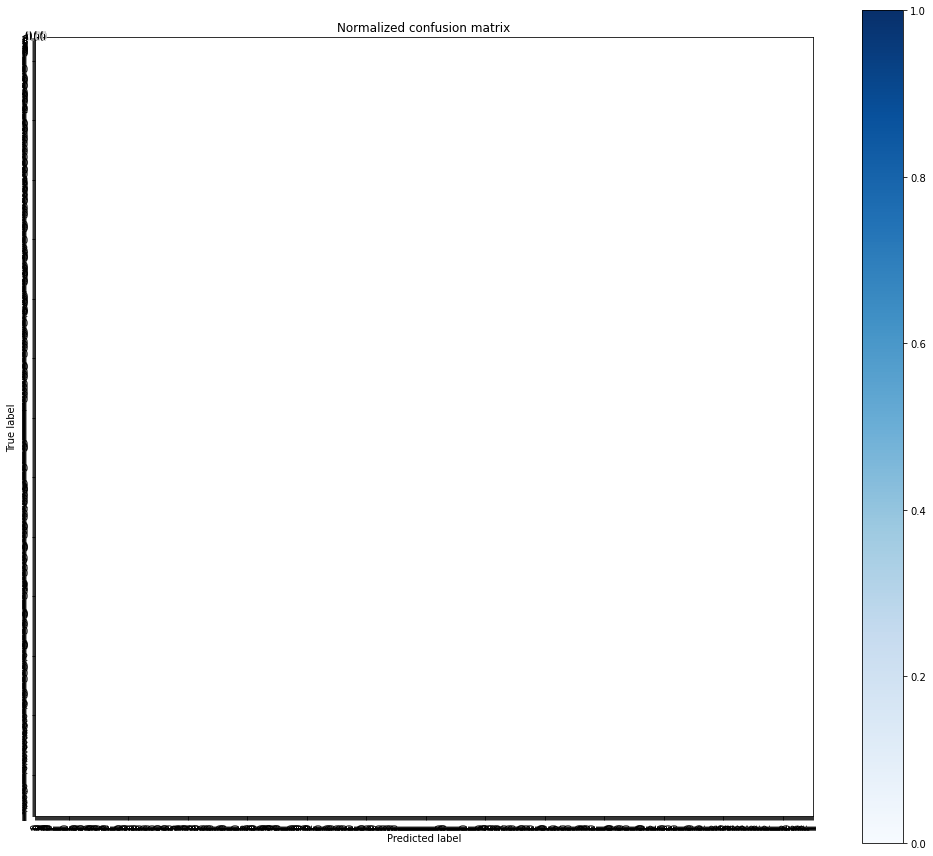

In [126]:
text_labels = encoder.classes_
label_names = df.Sentiment

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction[0])]
    #print(test_files_names.iloc[i])
    print('Actual label:' + str(test_tags.iloc[i]))
    print("Predicted label: " + str(predicted_label))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


y_pred = model.predict(x_test);
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
fig.align_labels()

fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=True,
                      title='Normalized confusion matrix')

fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)

In [127]:
prediction = model.predict(x_test)

In [128]:
predictions = np.argmax(prediction, axis = 1)

In [153]:
y_test_labels = np.argmax(y_test, axis =1)

In [154]:
y_train_labels = np.argmax(y_train, axis =1)

In [155]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test_labels, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.         0.         0.11949686]
recall: [0. 0. 1.]
fscore: [0.         0.         0.21348315]
support: [  9 131  19]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y_test_labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(recall)

print(precision)

[0. 0. 1.]
[       nan        nan 0.11949686]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [157]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('not majority')

X_sm, y_sm = smote.fit_sample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1425, 15000) (1425, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [158]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)
num_epochs =10
batch_size = 128
history = model.fit(X_sm, y_sm,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    class_weight=class_weight,
                    validation_split=0.2)

ValueError: ignored